## Question 1 :  Generating a dataset for binary classification

Generate a synthetic dataset for binary classification using make classification from the scikit-learn library. The dataset should have 1000 samples, 2 features, and their labels. Introduce some overlap between classes by adjusting the relevant parameter(s). Split the dataset into train and test sets. Plot the training data using matplotlib.

In [187]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [188]:
#The following function returns two numpy arrays X,y where X is the features and y is the corresponding labels.
X, y = make_classification(
                n_samples=1000,    # No. of observations
                n_features=2,     # No. of features
                n_redundant=0,    # No. of redundant features
                n_classes=2,      # No. of classes 
                class_sep=1.5,    # To separate classes
                random_state=1)  # For reproducibility


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


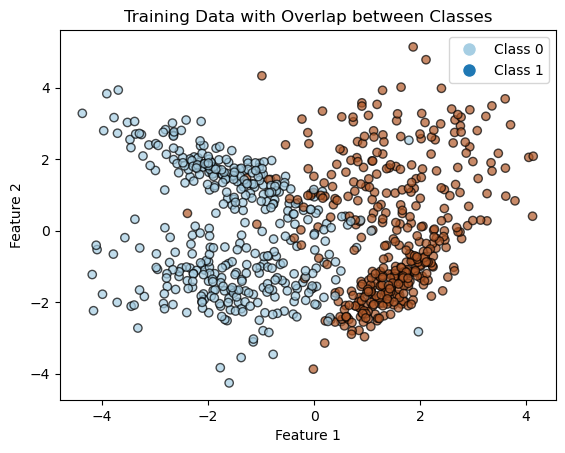

In [190]:
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', edgecolor='k', alpha=0.7)
plt.title('Training Data with Overlap between Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(0), markersize=10, label='Class 0'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(1), markersize=10, label='Class 1')],
           loc='best')
plt.show()

## Question 2 : Perceptron Algorithm from Scratch

Write a Python function to implement the Perceptron algorithm from scratch. The function should take the dataset, learning rate, and the number of iterations as parameters.

In [191]:
import numpy as np
from sklearn.datasets import make_classification
import random
import matplotlib.pyplot as plt


In [192]:
def Perceptron_algo(X, y, w, l_rate=0.1,itera=5):
    n_features = X.shape[1]
    bias=1
    for _ in range(itera):
        for i in range(len(X)):

            sum_val = np.dot(X[i], w) + bias
            #print(sum_val)
            #print(type(sum_val))

            if sum_val >= 0:
                prediction=1
            else:
                prediction=-1
                
            if prediction != y[i]:
                w += l_rate * y[i] * X[i]  # Update weights
                bias += l_rate * y[i]
    print(w,bias)
    return w, bias



## Train and Test the Model

Use the generated dataset to train your Perceptron algorithm. Experiment with different learning rates and iterations. Select the best model based on accuracy and print the classification report. Plot the decision boundary for the best model on the training data and evaluate the model on the test data.

In [193]:
def mean_squared_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
    
weights = np.random.random(n_features)
y_test = 2 * y_test - 1
y_train = 2 * y_train - 1
l_rate=0.5 #input("Enter learning rate")
itera=500 #input("Enter number of iterations")
weights,bias = Perceptron_algo(X_train,y_train,weights, l_rate,itera)

linear_output = np.dot(X_test, weights) + bias
linear_output = np.where(linear_output > 0, 1, -1)
print(mean_squared_loss(y_test, linear_output))


[1.65616541 0.62003958] 0.0
0.28


[-5.53367039 -5.42476886 -5.31586733 -5.2069658  -5.09806427 -4.98916274
 -4.88026121 -4.77135968 -4.66245815 -4.55355662 -4.44465509 -4.33575356
 -4.22685203 -4.1179505  -4.00904897 -3.90014744 -3.79124591 -3.68234439
 -3.57344286 -3.46454133 -3.3556398  -3.24673827 -3.13783674 -3.02893521
 -2.92003368 -2.81113215 -2.70223062 -2.59332909 -2.48442756 -2.37552603
 -2.2666245  -2.15772297 -2.04882144 -1.93991991 -1.83101838 -1.72211685
 -1.61321532 -1.50431379 -1.39541226 -1.28651073 -1.1776092  -1.06870768
 -0.95980615 -0.85090462 -0.74200309 -0.63310156 -0.52420003 -0.4152985
 -0.30639697 -0.19749544 -0.08859391  0.02030762  0.12920915  0.23811068
  0.34701221  0.45591374  0.56481527  0.6737168   0.78261833  0.89151986
  1.00042139  1.10932292  1.21822445  1.32712598  1.43602751  1.54492903
  1.65383056  1.76273209  1.87163362  1.98053515  2.08943668  2.19833821
  2.30723974  2.41614127  2.5250428   2.63394433  2.74284586  2.85174739
  2.96064892  3.06955045  3.17845198  3.28735351  3.

<Figure size 640x480 with 0 Axes>

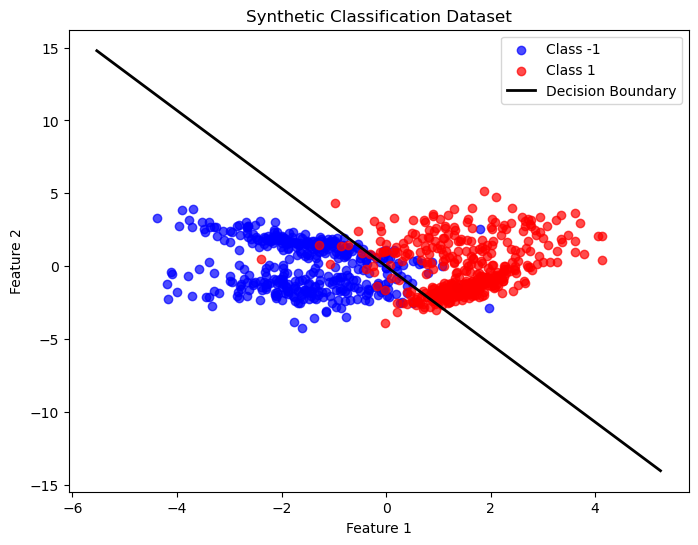

In [194]:


if abs(weights[1]) > 1e-6:  
    xx = np.linspace(x_min, x_max, 100)
    yy = -(weights[0] * xx + bias) / weights[1]
else:
    # If w[1] is zero, plot a vertical line
    xx = np.array([-(bias / weights[0])] * 100)  # Vertical line at x = -b / w[0]
    yy = np.linspace(y_min, y_max, 100)
print(xx)

plt.clf()
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each class (0 or 1)
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color='blue', label='Class -1', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1', alpha=0.7)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Plot decision boundary
plt.plot(xx, yy, color='black', label="Decision Boundary", linewidth=2)

# Adding labels and title
plt.title("Synthetic Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

## Logistic Regression

Implement logistic regression using the scikit-learn library on the synthetic dataset already generated. Train the model on the training set and evaluate its performance on the test set. Print the classification report and plot the
decision boundary for the logistic regression model.